# 準備

In [ ]:
!pip install shap

In [ ]:
!pip install japanize_matplotlib

In [62]:
import shap
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 12
import japanize_matplotlib
import seaborn as sns
# colabをダークモードにしていると、グラフ表示したときに目盛が見えなくなってしまうことに対する対処
sns.set_style("white") 

In [41]:
# ボストンデータセットを読み込む
X, y = shap.datasets.boston()

# データセットを学習:テスト=8:2で分ける
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8)
train_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
131,1.19294,0.0,21.89,0.0,0.624,6.326,97.7,2.2710,4.0,437.0,21.2,396.90,12.26
285,0.01096,55.0,2.25,0.0,0.389,6.453,31.9,7.3073,1.0,300.0,15.3,394.72,8.23
252,0.08221,22.0,5.86,0.0,0.431,6.957,6.8,8.9067,7.0,330.0,19.1,386.09,3.53
164,2.24236,0.0,19.58,0.0,0.605,5.854,91.8,2.4220,5.0,403.0,14.7,395.11,11.64
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.03615,80.0,4.95,0.0,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70
350,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98
284,0.00906,90.0,2.97,0.0,0.400,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85
89,0.05302,0.0,3.41,0.0,0.489,7.079,63.1,3.4145,2.0,270.0,17.8,396.06,5.70


[14:44:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE 3.9781744221383417


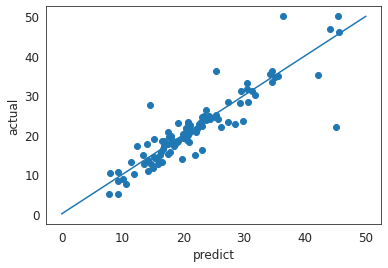

In [43]:
# 回帰モデルで学習
model = XGBRegressor()
model.fit(train_X, train_y)

# テストデータを予測し、精度（RMSE）を出してみる
pred = model.predict(test_X)
print('RMSE', np.sqrt(mean_squared_error(pred, test_y)))

# 予測と正解の関係性をプロットしてみる
plt.xlabel('predict')
plt.ylabel('actual')
plt.scatter(pred, test_y)
plt.plot([0, test_y.max()], [0, test_y.max()])

<BarContainer object of 13 artists>

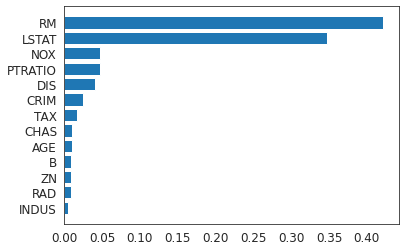

In [58]:
# XGBoostのfeature importanceをみてみる
importance_df = pd.DataFrame([model.feature_importances_], columns=train_X.columns, index=['score']).T
importance_df = importance_df.sort_values('score', ascending=True)
plt.barh(importance_df.index, importance_df['score'])

# SHAPを使ってみる

In [66]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_X)

In [67]:
# notebook上でSHAPを表示するときは以下の宣言が必要
shap.initjs()

display(shap.force_plot(explainer.expected_value, shap_values[0,:], test_X.iloc[0,:]))

In [70]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, test_X)

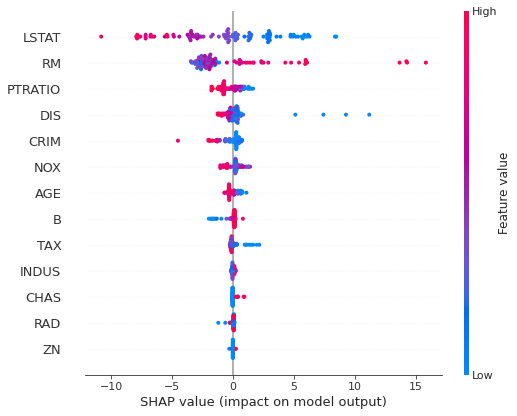

In [72]:
shap.initjs()
shap.summary_plot(shap_values, test_X)

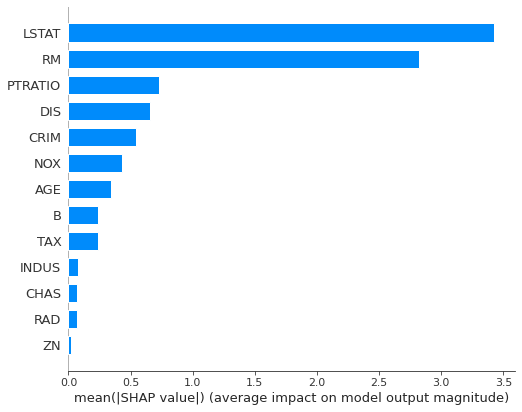

In [73]:
shap.initjs()
shap.summary_plot(shap_values, test_X, plot_type='bar')